In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB

In [2]:
# load dataset
data = pd.read_csv("C:/Users/bensi/Desktop/Project/heart_failure_clinical_records_dataset.csv")

In [3]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [4]:
# checking for missing values
print(data.isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [5]:
# Drop the 'time' column
newdata = data.drop('time', axis=1)

# Display the DataFrame after dropping the 'time' column
print("\nDataFrame after dropping 'time' column:")
print(newdata.head())


DataFrame after dropping 'time' column:
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  DEATH_EVENT  
0        0            1  
1        0 

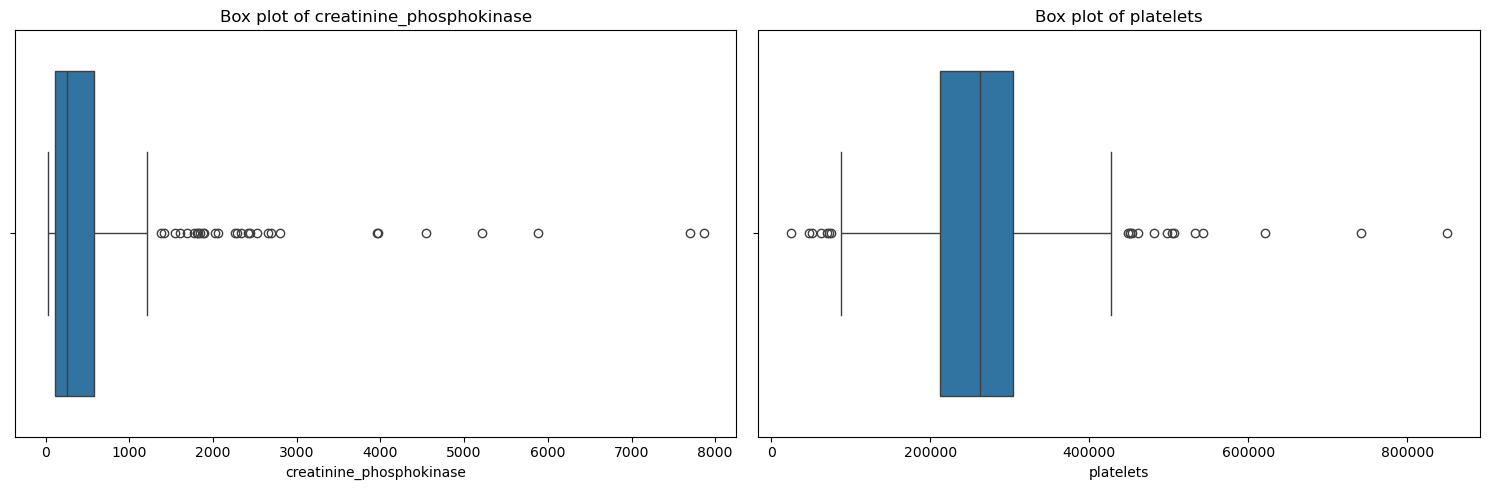

In [6]:
# Box plots for 'creatinine_phosphokinase' and 'platelets' to visualize outliers
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=newdata['creatinine_phosphokinase'])
plt.title('Box plot of creatinine_phosphokinase')

plt.subplot(1, 2, 2)
sns.boxplot(x=newdata['platelets'])
plt.title('Box plot of platelets')

plt.tight_layout()
plt.show()


In [7]:
# Function to detect outliers using IQR
def detect_outliers_iqr(newdata, column):
    Q1 = newdata[column].quantile(0.25)
    Q3 = newdata[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = newdata[(newdata[column] < lower_bound) | (newdata[column] > upper_bound)]
    return outliers


In [8]:
# Function to remove outliers using IQR
def remove_outliers_iqr(newdata, column):
    Q1 = newdata[column].quantile(0.25)
    Q3 = newdata[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_cleaned = newdata[~((newdata[column] < lower_bound) | (newdata[column] > upper_bound))]
    return data_cleaned

In [9]:
# Detect and print outliers in creatinine_phosphokinase
outliers_cpk = detect_outliers_iqr(newdata, 'creatinine_phosphokinase')
print(f'Number of outliers in creatinine_phosphokinase: {outliers_cpk.shape[0]}')
print(outliers_cpk)

# Detect and print outliers in platelets
outliers_platelets = detect_outliers_iqr(newdata, 'platelets')
print(f'Number of outliers in platelets: {outliers_platelets.shape[0]}')
print(outliers_platelets)

# Remove outliers in creatinine_phosphokinase
data_cleaned = remove_outliers_iqr(newdata, 'creatinine_phosphokinase')

# Remove outliers in platelets from the cleaned data
data_cleaned = remove_outliers_iqr(data_cleaned, 'platelets')

# Display the original and cleaned dataset shapes
print(f'Original dataset shape: {newdata.shape}')
print(f'Cleaned dataset shape: {data_cleaned.shape}')

Number of outliers in creatinine_phosphokinase: 29
      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
1    55.0        0                      7861         0                 38   
38   60.0        0                      2656         1                 30   
46   51.0        0                      1380         0                 25   
52   60.0        0                      3964         1                 62   
60   45.0        0                      7702         1                 25   
72   85.0        0                      5882         0                 35   
103  42.0        0                      5209         0                 30   
107  45.0        1                      1876         1                 35   
130  53.0        1                      1808         0                 60   
134  81.0        0                      4540         0                 35   
139  50.0        0                      1548         0                 30   
147  64.0        0       

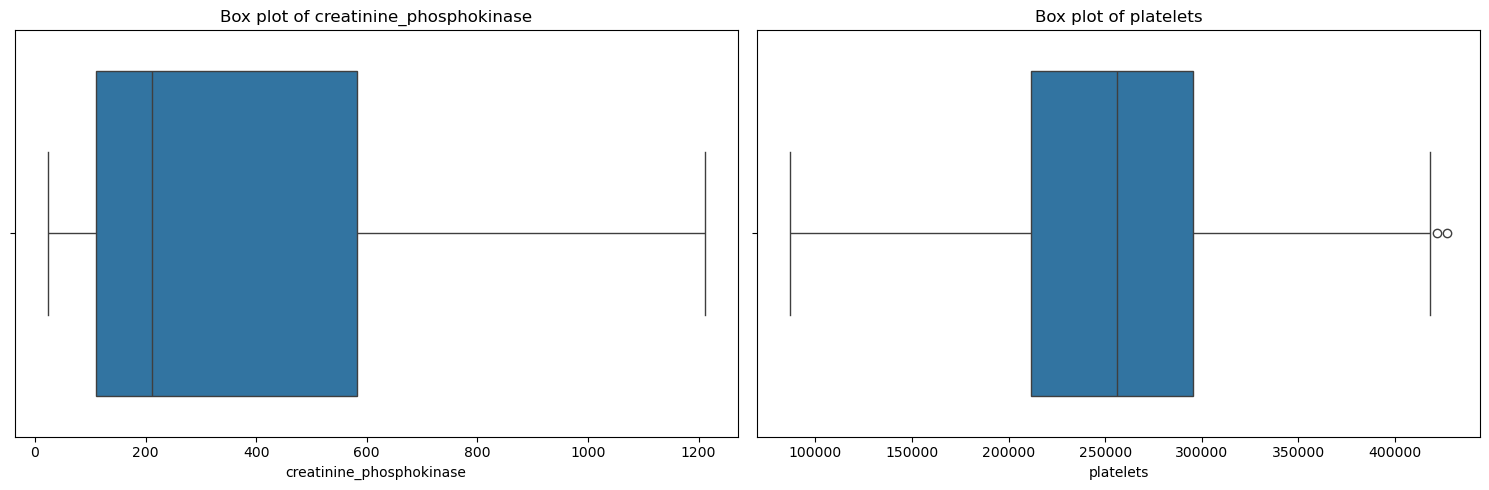

In [10]:
# Box plots for 'creatinine_phosphokinase' and 'platelets' to visualize outliers
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=data_cleaned['creatinine_phosphokinase'])
plt.title('Box plot of creatinine_phosphokinase')

plt.subplot(1, 2, 2)
sns.boxplot(x=data_cleaned['platelets'])
plt.title('Box plot of platelets')

plt.tight_layout()
plt.show()

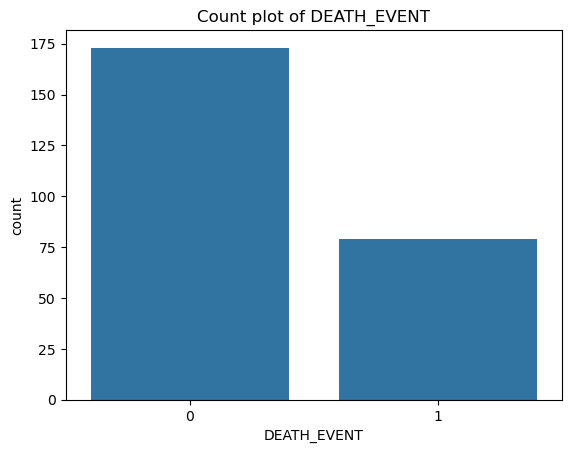

In [11]:
# Count plot for the target variable 'DEATH_EVENT'
sns.countplot(x='DEATH_EVENT', data=data_cleaned)
plt.title('Count plot of DEATH_EVENT')
plt.show()

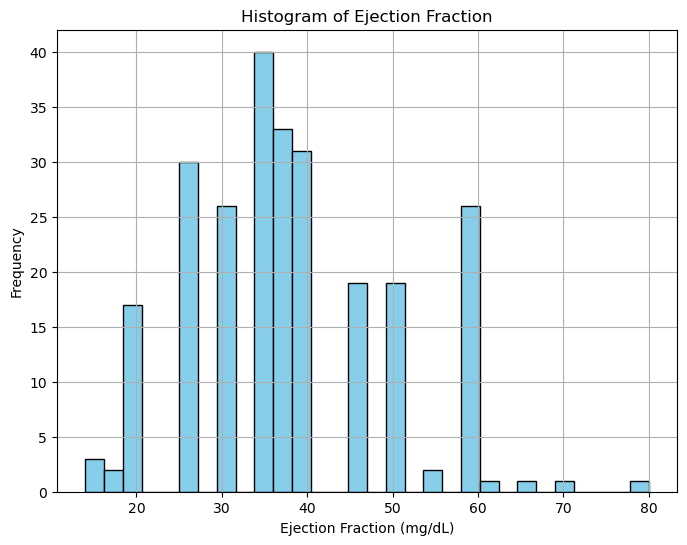

In [12]:
#Histogram of Ejection Fraction
plt.figure(figsize=(8, 6))
plt.hist(data_cleaned['ejection_fraction'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Ejection Fraction')
plt.xlabel('Ejection Fraction (mg/dL)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

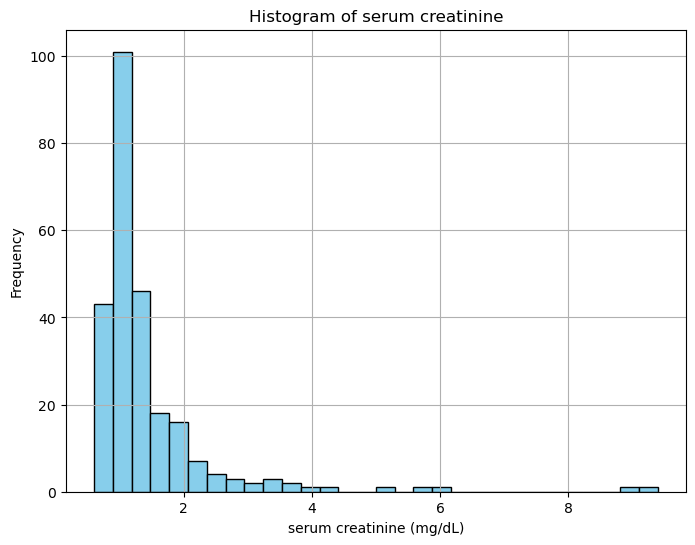

In [13]:
#Histogram of serum creatinine
plt.figure(figsize=(8, 6))
plt.hist(data_cleaned['serum_creatinine'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of serum creatinine')
plt.xlabel('serum creatinine (mg/dL)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

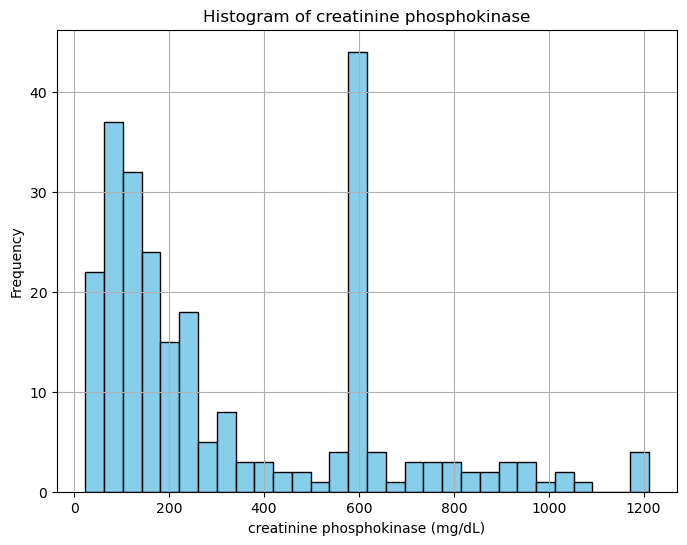

In [14]:
#Histogram of creatinine phosphokinase
plt.figure(figsize=(8, 6))
plt.hist(data_cleaned['creatinine_phosphokinase'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of creatinine phosphokinase')
plt.xlabel('creatinine phosphokinase (mg/dL)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

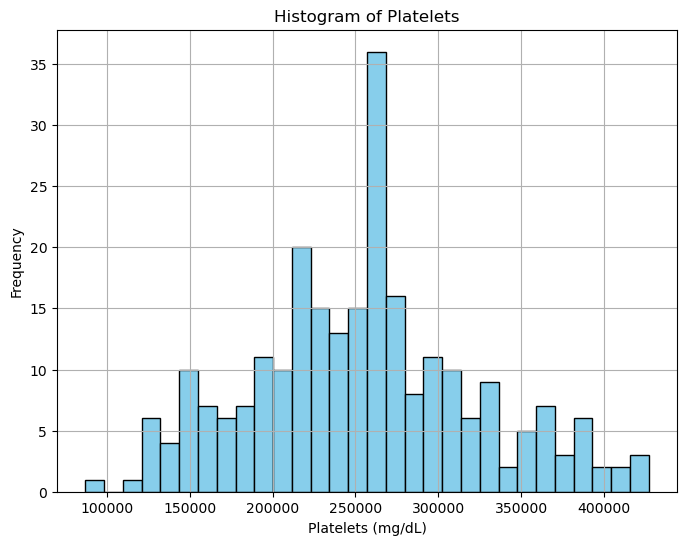

In [15]:
#Histogram of Platelets
plt.figure(figsize=(8, 6))
plt.hist(data_cleaned['platelets'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Platelets')
plt.xlabel('Platelets (mg/dL)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

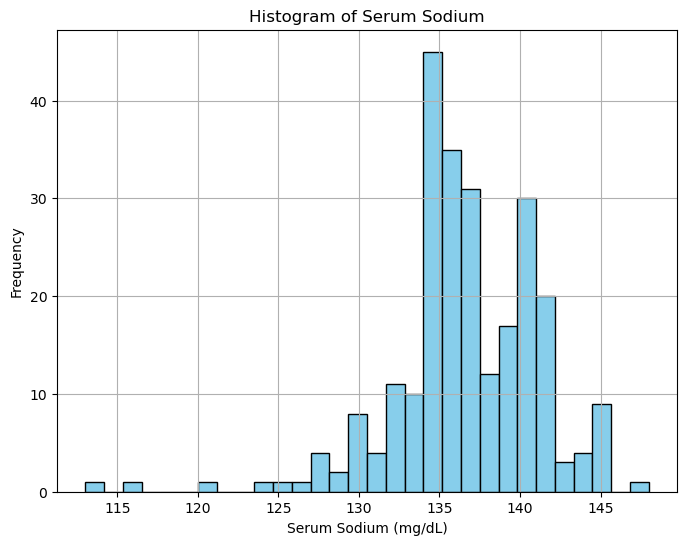

In [16]:
#Histogram of Serum Sodium
plt.figure(figsize=(8, 6))
plt.hist(data_cleaned['serum_sodium'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Serum Sodium')
plt.xlabel('Serum Sodium (mg/dL)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

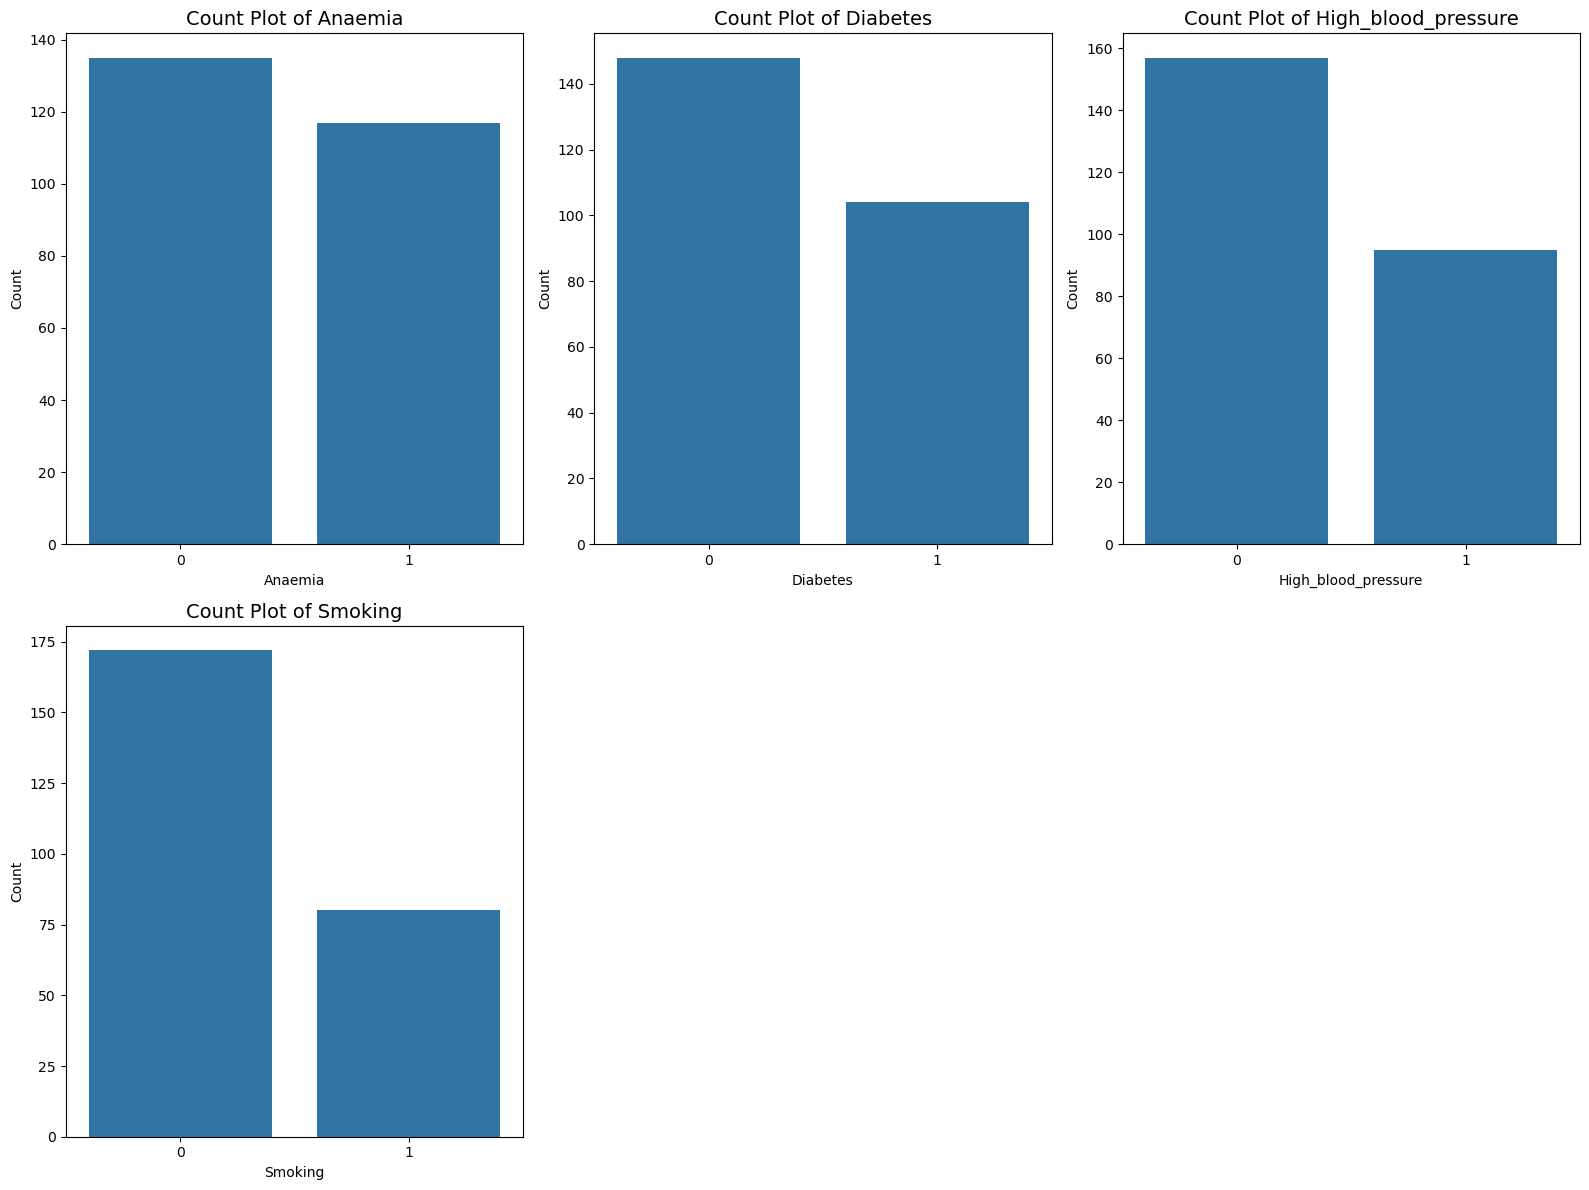

In [17]:
# Count plots for other categorical features
categorical_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, data=data_cleaned)
    plt.title(f'Count Plot of {feature.capitalize()}', fontsize=14)
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

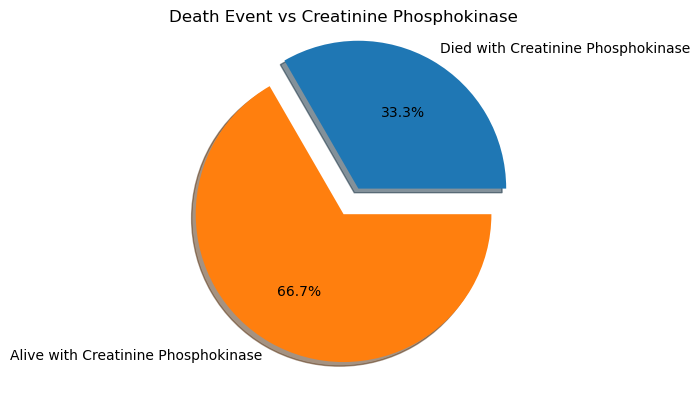

In [18]:
# Peichart for creatinine phosphokinase
threshold = 500

# Patients who died with creatinine_phosphokinase
patients_high_cp_died = data_cleaned['DEATH_EVENT'][(data_cleaned.creatinine_phosphokinase > threshold) & (data_cleaned.DEATH_EVENT == 1)]

# Patients who did not die with creatinine_phosphokinase
patients_high_cp_alive = data_cleaned['DEATH_EVENT'][(data_cleaned.creatinine_phosphokinase > threshold) & (data_cleaned.DEATH_EVENT == 0)]

# Lengths for the pie chart
len_cp_died = len(patients_high_cp_died)
len_cp_alive = len(patients_high_cp_alive)

# Data for pie chart
arr_cp = [len_cp_died, len_cp_alive]
labels_cp = ['Died with Creatinine Phosphokinase', 'Alive with Creatinine Phosphokinase']

# Plotting the pie chart
plt.pie(arr_cp, labels=labels_cp, explode=[0.2, 0.0], shadow=True, autopct='%1.1f%%')
plt.title('Death Event vs Creatinine Phosphokinase')
plt.show()

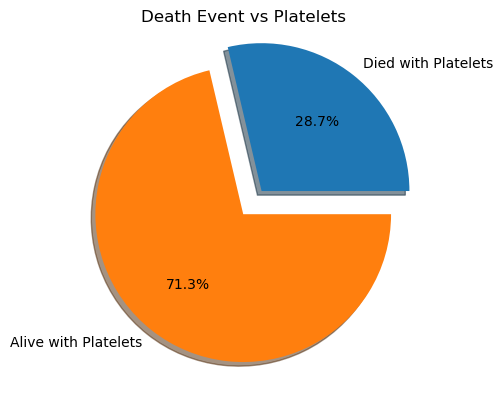

In [19]:
# Piechart for platelets
threshold_platelets = 250000

# Patients who died with platelets
patients_high_platelets_died = data_cleaned['DEATH_EVENT'][(data_cleaned.platelets > threshold_platelets) & (data_cleaned.DEATH_EVENT == 1)]

# Patients who did not die with platelets
patients_high_platelets_alive = data_cleaned['DEATH_EVENT'][(data_cleaned.platelets > threshold_platelets) & (data_cleaned.DEATH_EVENT == 0)]

# Lengths for the pie chart
len_platelets_died = len(patients_high_platelets_died)
len_platelets_alive = len(patients_high_platelets_alive)

# Data for pie chart
arr_platelets = [len_platelets_died, len_platelets_alive]
labels_platelets = ['Died with Platelets', 'Alive with Platelets']

# Plotting the pie chart
plt.pie(arr_platelets, labels=labels_platelets, explode=[0.2, 0.0], shadow=True, autopct='%1.1f%%')
plt.title('Death Event vs Platelets')
plt.show()

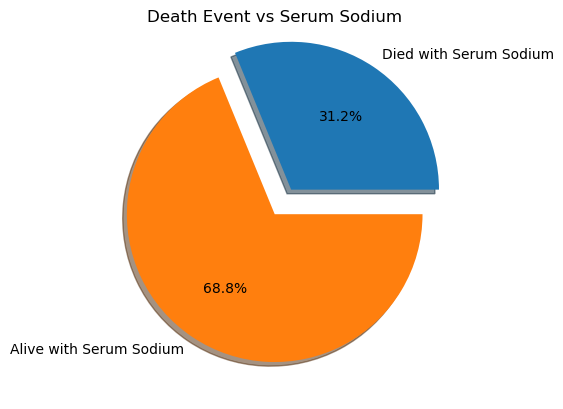

In [20]:
# Piechart for serum sodium (e.g., above 145 mEq/L)
threshold_sodium = 120

# Patients who died with serum sodium
patients_high_sodium_died = data_cleaned['DEATH_EVENT'][(data_cleaned.serum_sodium > threshold_sodium) & (data_cleaned.DEATH_EVENT == 1)]

# Patients who did not die with serum sodium
patients_high_sodium_alive = data_cleaned['DEATH_EVENT'][(data_cleaned.serum_sodium > threshold_sodium) & (data_cleaned.DEATH_EVENT == 0)]

# Lengths for the pie chart
len_sodium_died = len(patients_high_sodium_died)
len_sodium_alive = len(patients_high_sodium_alive)

# Data for pie chart
arr_sodium = [len_sodium_died, len_sodium_alive]
labels_sodium = ['Died with Serum Sodium', 'Alive with Serum Sodium']

# Plotting the pie chart
plt.pie(arr_sodium, labels=labels_sodium, explode=[0.2, 0.0], shadow=True, autopct='%1.1f%%')
plt.title('Death Event vs Serum Sodium')
plt.show()

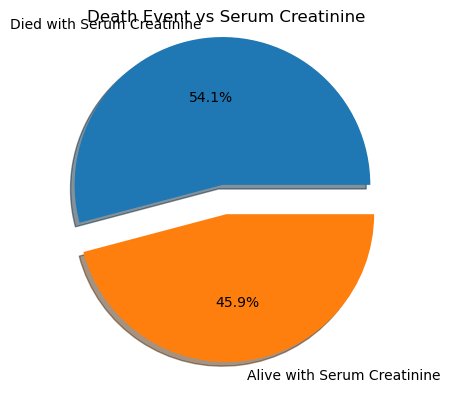

In [21]:
# Piechart for serum creatinine
threshold = 1.2

# Patients who died with serum_creatinine
patients_high_sc_died = data_cleaned['DEATH_EVENT'][(data_cleaned.serum_creatinine > threshold) & (data_cleaned.DEATH_EVENT == 1)]

# Patients who did not die with serum_creatinine
patients_high_sc_alive = data_cleaned['DEATH_EVENT'][(data_cleaned.serum_creatinine > threshold) & (data_cleaned.DEATH_EVENT == 0)]

# Lengths for the pie chart
len_sc_died = len(patients_high_sc_died)
len_sc_alive = len(patients_high_sc_alive)

# Data for pie chart
arr_sc = [len_sc_died, len_sc_alive]
labels_sc = ['Died with Serum Creatinine', 'Alive with Serum Creatinine']

# Plotting the pie chart
plt.pie(arr_sc, labels=labels_sc, explode=[0.2, 0.0], shadow=True, autopct='%1.1f%%')
plt.title('Death Event vs Serum Creatinine')
plt.show()

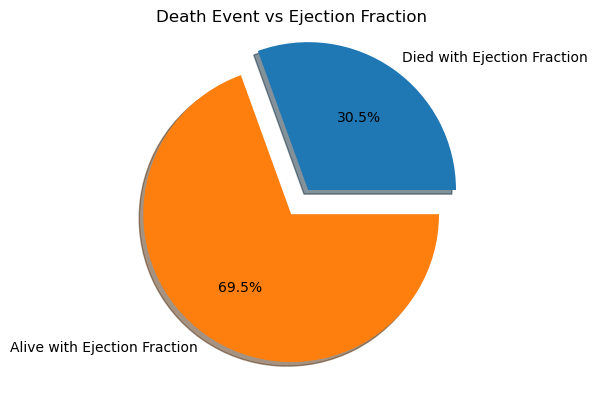

In [22]:
# Piechart for ejection fraction
threshold_ef = 15

# Patients who died with ejection fraction
patients_high_ef_died = data_cleaned['DEATH_EVENT'][(data_cleaned.ejection_fraction > threshold_ef) & (data_cleaned.DEATH_EVENT == 1)]

# Patients who did not die with ejection fraction
patients_high_ef_alive = data_cleaned['DEATH_EVENT'][(data_cleaned.ejection_fraction > threshold_ef) & (data_cleaned.DEATH_EVENT == 0)]

# Lengths for the pie chart
len_ef_died = len(patients_high_ef_died)
len_ef_alive = len(patients_high_ef_alive)

# Data for pie chart
arr_ef = [len_ef_died, len_ef_alive]
labels_ef = ['Died with Ejection Fraction', 'Alive with Ejection Fraction']

# Plotting the pie chart
plt.pie(arr_ef, labels=labels_ef, explode=[0.2, 0.0], shadow=True, autopct='%1.1f%%')
plt.title('Death Event vs Ejection Fraction')
plt.show()

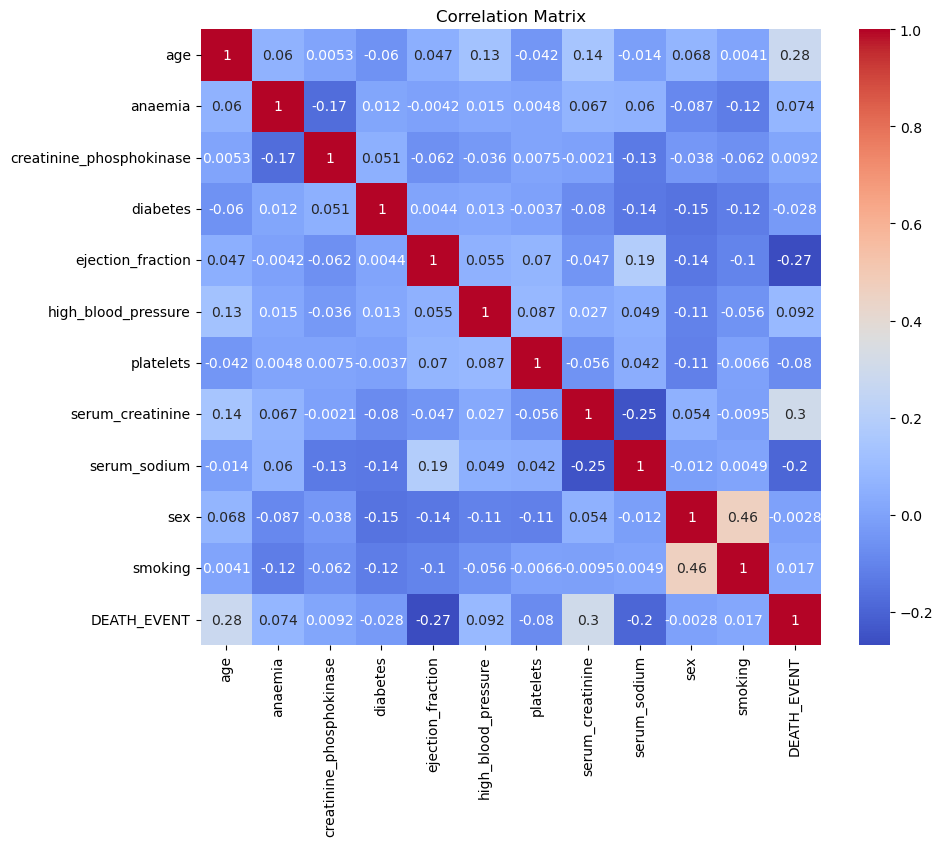

In [23]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [24]:
#Feature Engineering
data_cleaned['creatinine_ejection_interaction'] = data_cleaned['serum_creatinine'] * data_cleaned['ejection_fraction']
data_cleaned['age_sodium_interaction'] = data_cleaned['age'] * data_cleaned['serum_sodium']
print(data_cleaned.head())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   
5  90.0        1                        47         0                 40   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1   265000.0               1.9           130    1   
2                    0   162000.0               1.3           129    1   
3                    0   210000.0               1.9           137    1   
4                    0   327000.0               2.7           116    0   
5                    1   204000.0               2.1           132    1   

   smoking  DEATH_EVENT  creatinine_ejection_interaction  \
0        0            1                     

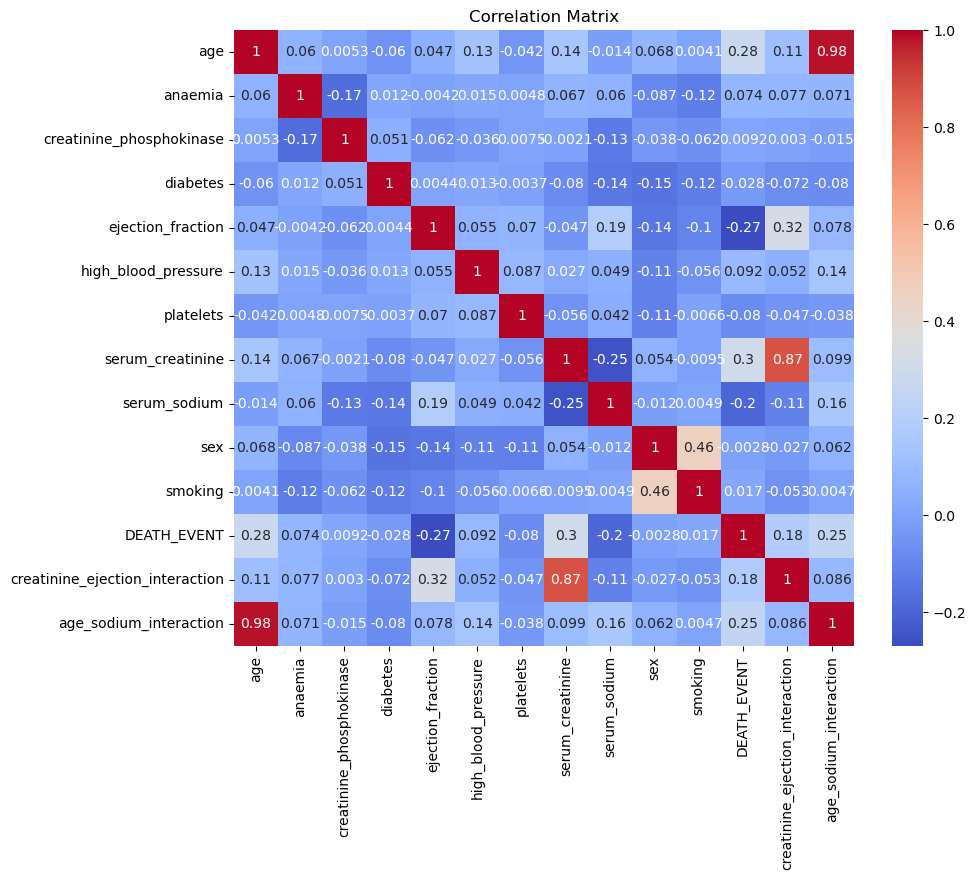

In [25]:
# Correlation heatmap after feature engineering
plt.figure(figsize=(10, 8))
correlation_matrix = data_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [26]:
# 2. Data Preprocessing
print("\n2. Data Preprocessing")
# Define features and target
Feature= ['age','serum_creatinine', 'ejection_fraction','creatinine_ejection_interaction', 'serum_sodium','age_sodium_interaction','high_blood_pressure']
X = data_cleaned[Feature]
y = data_cleaned['DEATH_EVENT']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print("Shape of X_train after SMOTE and scaling:", X_train_smote.shape)
print("Shape of X_test after scaling:", X_test_scaled.shape)

# Check the distribution of the target variable after SMOTE
print("Distribution of target variable after SMOTE:", pd.Series(y_train_smote).value_counts())


2. Data Preprocessing
Shape of X_train after SMOTE and scaling: (278, 7)
Shape of X_test after scaling: (51, 7)
Distribution of target variable after SMOTE: DEATH_EVENT
0    139
1    139
Name: count, dtype: int64


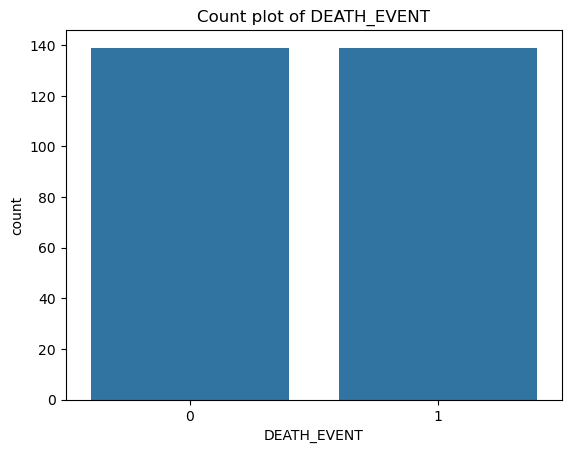

In [27]:
# Count plot for the target variable 'DEATH_EVENT'
sns.countplot(x=y_train_smote)
plt.title('Count plot of DEATH_EVENT')
plt.show()

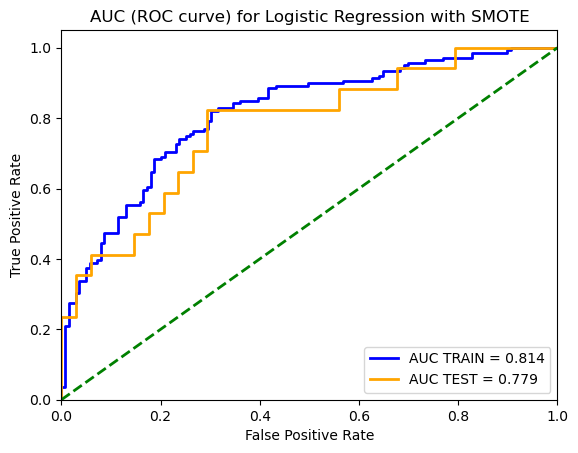

Logistic Regression Accuracy: 0.7254901960784313
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.74      0.78        34
           1       0.57      0.71      0.63        17

    accuracy                           0.73        51
   macro avg       0.70      0.72      0.71        51
weighted avg       0.75      0.73      0.73        51



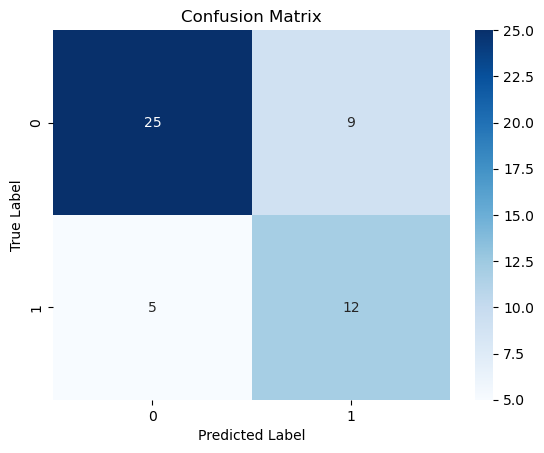

In [28]:
# Plot ROC curve for Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_smote, y_train_smote)

# Predict probabilities for ROC curve
y_train_prob = log_reg.predict_proba(X_train_smote)[:, 1]
y_test_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# ROC curve and AUC for training data
fpr_train, tpr_train, _ = roc_curve(y_train_smote, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)

# ROC curve and AUC for testing data
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curves
plt.figure()
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'AUC TRAIN = {roc_auc_train:.3f}')
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label=f'AUC TEST = {roc_auc_test:.3f}')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC (ROC curve) for Logistic Regression with SMOTE')
plt.legend(loc='lower right')
plt.show()

# predictions
y_pred_lr = log_reg.predict(X_test_scaled)

# Evaluate the model
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_lr))
print('Classification Report:\n', classification_report(y_test, y_pred_lr))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['0', '1'], 
            yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

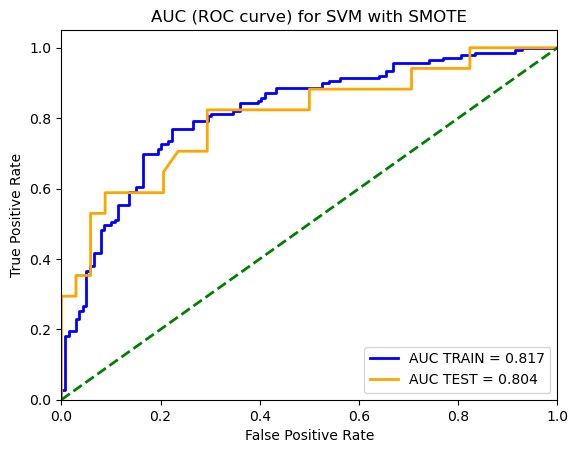

SVM Train AUC: 0.82
SVM Test AUC: 0.80
SVM Accuracy: 0.7450980392156863
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.81        34
           1       0.61      0.65      0.63        17

    accuracy                           0.75        51
   macro avg       0.71      0.72      0.72        51
weighted avg       0.75      0.75      0.75        51



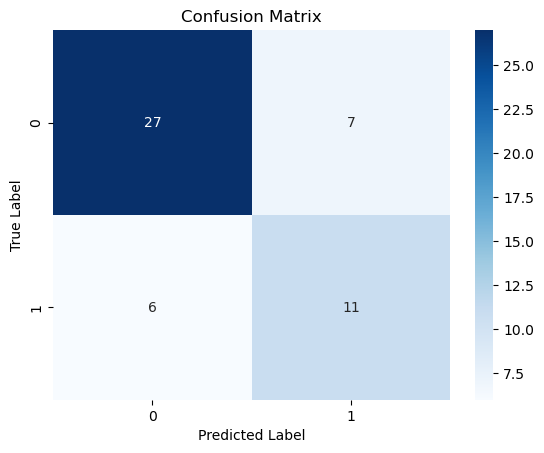

In [29]:
# Train the SVM model
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train_smote, y_train_smote)

# Predict probabilities
y_train_prob_svm = svm.predict_proba(X_train_smote)[:, 1]
y_test_prob_svm = svm.predict_proba(X_test_scaled)[:, 1]

# ROC curve and AUC for training data
fpr_train_svm, tpr_train_svm, _ = roc_curve(y_train_smote, y_train_prob_svm)
roc_auc_train_svm = auc(fpr_train_svm, tpr_train_svm)

# ROC curve and AUC for testing data
fpr_test_svm, tpr_test_svm, _ = roc_curve(y_test, y_test_prob_svm)
roc_auc_test_svm = auc(fpr_test_svm, tpr_test_svm)

# Plot ROC curves
plt.figure()
plt.plot(fpr_train_svm, tpr_train_svm, color='blue', lw=2, label=f'AUC TRAIN = {roc_auc_train_svm:.3f}')
plt.plot(fpr_test_svm, tpr_test_svm, color='orange', lw=2, label=f'AUC TEST = {roc_auc_test_svm:.3f}')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC (ROC curve) for SVM with SMOTE')
plt.legend(loc='lower right')
plt.show()

# Calculate AUC for both train and test data
auc_svm_train = roc_auc_score(y_train_smote, y_train_prob_svm)
print(f'SVM Train AUC: {auc_svm_train:.2f}')

auc_svm_test = roc_auc_score(y_test, y_test_prob_svm)
print(f'SVM Test AUC: {auc_svm_test:.2f}')

# predictions
y_pred_svm = svm.predict(X_test_scaled)

# Evaluate the model
print('SVM Accuracy:', accuracy_score(y_test, y_pred_svm))
print('Classification Report:\n', classification_report(y_test, y_pred_svm))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['0', '1'], 
            yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

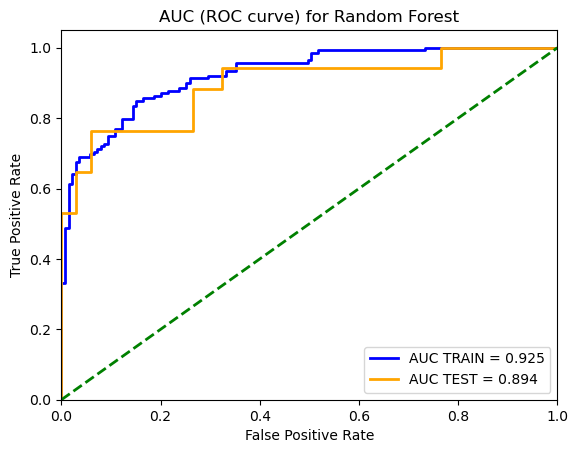

RF Train AUC: 0.92
RF Test AUC: 0.89
Random Forest Accuracy: 0.8627450980392157
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.90        34
           1       0.92      0.65      0.76        17

    accuracy                           0.86        51
   macro avg       0.88      0.81      0.83        51
weighted avg       0.87      0.86      0.86        51



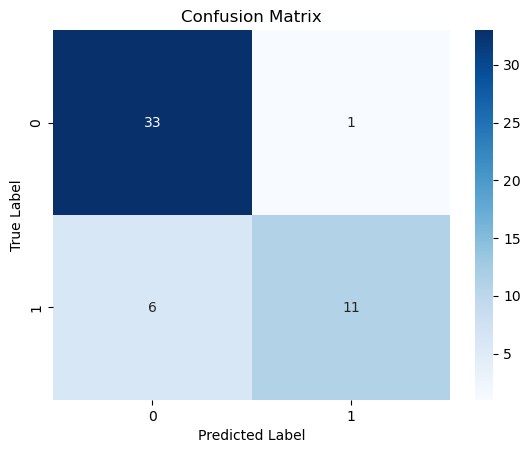

In [30]:
# Initialize the Random Forest model with additional regularization
rf = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=30, min_samples_leaf=4, random_state=42)

# Train the model
rf.fit(X_train_smote, y_train_smote)

# Predict probabilities for ROC curve
y_train_prob_rf = rf.predict_proba(X_train_smote)[:, 1]
y_test_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# predictions
y_pred_rf = rf.predict(X_test_scaled)

# ROC curve and AUC for training data
fpr_train_rf, tpr_train_rf, _ = roc_curve(y_train_smote, y_train_prob_rf)
roc_auc_train_rf = auc(fpr_train_rf, tpr_train_rf)

# ROC curve and AUC for testing data
fpr_test_rf, tpr_test_rf, _ = roc_curve(y_test, y_test_prob_rf)
roc_auc_test_rf = auc(fpr_test_rf, tpr_test_rf)

# Plot ROC curves
plt.figure()
plt.plot(fpr_train_rf, tpr_train_rf, color='blue', lw=2, label=f'AUC TRAIN = {roc_auc_train_rf:.3f}')
plt.plot(fpr_test_rf, tpr_test_rf, color='orange', lw=2, label=f'AUC TEST = {roc_auc_test_rf:.3f}')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC (ROC curve) for Random Forest')
plt.legend(loc='lower right')
plt.show()

# Calculate AUC for both train and test data
auc_rf_train = roc_auc_score(y_train_smote, y_train_prob_rf)
print(f'RF Train AUC: {auc_rf_train:.2f}')

auc_rf_test = roc_auc_score(y_test, y_test_prob_rf)
print(f'RF Test AUC: {auc_rf_test:.2f}')

# Evaluate the model
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Classification Report:\n', classification_report(y_test, y_pred_rf))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['0', '1'], 
            yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

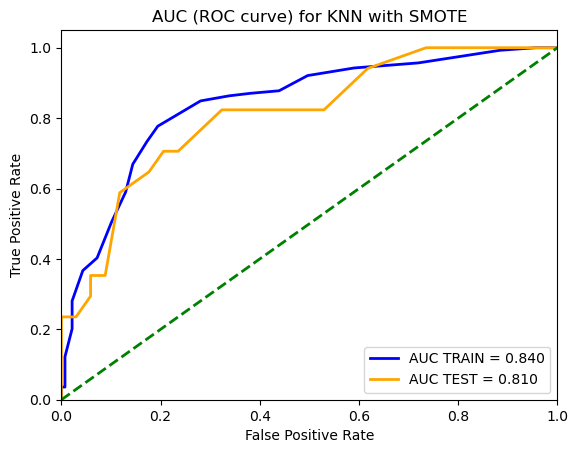

KNN Train AUC: 0.84
KNN Test AUC: 0.81
KNN Accuracy: 0.7843137254901961
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.85        34
           1       0.71      0.59      0.65        17

    accuracy                           0.78        51
   macro avg       0.76      0.74      0.75        51
weighted avg       0.78      0.78      0.78        51



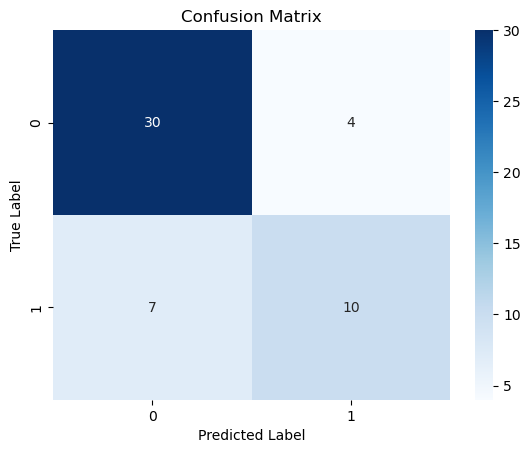

In [31]:
#Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=24, metric='manhattan')
knn.fit(X_train_smote, y_train_smote)

# Predict probabilities for ROC curve
y_train_prob_knn = knn.predict_proba(X_train_smote)[:, 1]
y_test_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]

# ROC curve and AUC for training data
fpr_train_knn, tpr_train_knn, _ = roc_curve(y_train_smote, y_train_prob_knn)
roc_auc_train_knn = auc(fpr_train_knn, tpr_train_knn)

# ROC curve and AUC for testing data
fpr_test_knn, tpr_test_knn, _ = roc_curve(y_test, y_test_prob_knn)
roc_auc_test_knn = auc(fpr_test_knn, tpr_test_knn)

# Plot ROC curves
plt.figure()
plt.plot(fpr_train_knn, tpr_train_knn, color='blue', lw=2, label=f'AUC TRAIN = {roc_auc_train_knn:.3f}')
plt.plot(fpr_test_knn, tpr_test_knn, color='orange', lw=2, label=f'AUC TEST = {roc_auc_test_knn:.3f}')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC (ROC curve) for KNN with SMOTE')
plt.legend(loc='lower right')
plt.show()

# Calculate AUC for both train and test data
auc_knn_train = roc_auc_score(y_train_smote, y_train_prob_knn)
print(f'KNN Train AUC: {auc_knn_train:.2f}')

auc_knn_test = roc_auc_score(y_test, y_test_prob_knn)
print(f'KNN Test AUC: {auc_knn_test:.2f}')

# predictions
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate the model
print('KNN Accuracy:', accuracy_score(y_test, y_pred_knn))
print('Classification Report:\n', classification_report(y_test, y_pred_knn))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['0', '1'], 
            yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

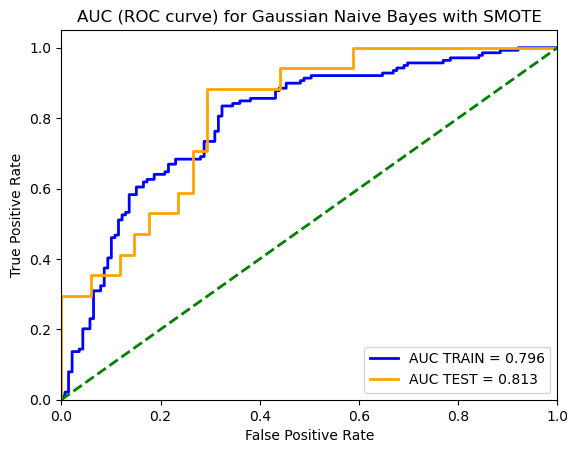

Naive Bayes Train AUC: 0.80
Naive Bayes Test AUC: 0.81
Naive Bayes Accuracy: 0.7254901960784313
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.71      0.77        34
           1       0.57      0.76      0.65        17

    accuracy                           0.73        51
   macro avg       0.71      0.74      0.71        51
weighted avg       0.76      0.73      0.73        51



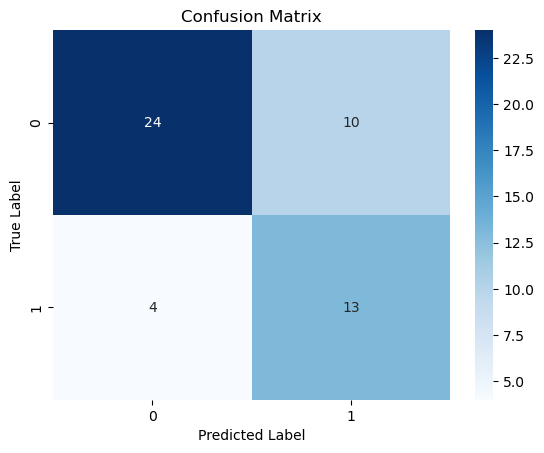

In [32]:
# Initialize Gaussian Naive Bayes
nb = GaussianNB()

# Train the model
nb.fit(X_train_smote, y_train_smote)

# Predict probabilities for ROC curve
y_train_prob_nb = nb.predict_proba(X_train_smote)[:, 1]
y_test_prob_nb = nb.predict_proba(X_test_scaled)[:, 1]

# ROC curve and AUC for training data
fpr_train_nb, tpr_train_nb, _ = roc_curve(y_train_smote, y_train_prob_nb)
roc_auc_train_nb = auc(fpr_train_nb, tpr_train_nb)

# ROC curve and AUC for testing data
fpr_test_nb, tpr_test_nb, _ = roc_curve(y_test, y_test_prob_nb)
roc_auc_test_nb = auc(fpr_test_nb, tpr_test_nb)

plt.figure()
plt.plot(fpr_train_nb, tpr_train_nb, color='blue', lw=2, label=f'AUC TRAIN = {roc_auc_train_nb:.3f}')
plt.plot(fpr_test_nb, tpr_test_nb, color='orange', lw=2, label=f'AUC TEST = {roc_auc_test_nb:.3f}')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC (ROC curve) for Gaussian Naive Bayes with SMOTE')
plt.legend(loc='lower right')
plt.show()

auc_nb_train = roc_auc_score(y_train_smote, y_train_prob_nb)
print(f'Naive Bayes Train AUC: {auc_nb_train:.2f}')

auc_nb_test = roc_auc_score(y_test, y_test_prob_nb)
print(f'Naive Bayes Test AUC: {auc_nb_test:.2f}')

# predictions
threshold = 0.2  # Try a lower threshold to increase recall
y_pred_nb = (y_test_prob_nb >= threshold).astype(int)
# Evaluate the model
print('Naive Bayes Accuracy:', accuracy_score(y_test, y_pred_nb))
print('Classification Report:\n', classification_report(y_test, y_pred_nb))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['0', '1'], 
            yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [33]:
from IPython.display import display, HTML
# Predicted probabilities
y_test_prob = log_reg.predict_proba(X_test_scaled)[:, 1]
y_test_prob = rf.predict_proba(X_test_scaled)[:, 1]
y_test_prob = svm.predict_proba(X_test_scaled)[:, 1]
y_test_prob = knn.predict_proba(X_test_scaled)[:, 1]
y_test_prob = nb.predict_proba(X_test_scaled)[:, 1]


#Evaluation Metrics
metrics = {
    'Model': ['Logistic Regression', 'Random Forest', 'SVM', 'kNN', 'NB'],
    'Accuracy (%)': [
        accuracy_score(y_test, y_pred_lr) * 100,
        accuracy_score(y_test, y_pred_rf) * 100,
        accuracy_score(y_test, y_pred_svm) * 100,
        accuracy_score(y_test, y_pred_knn) * 100,
        accuracy_score(y_test, y_pred_nb) * 100


    ],
    'Precision (%)': [
        precision_score(y_test, y_pred_lr) * 100,
        precision_score(y_test, y_pred_rf) * 100,
        precision_score(y_test, y_pred_svm) * 100,
        precision_score(y_test, y_pred_knn) * 100,
         precision_score(y_test, y_pred_nb) * 100


    ],
    'Recall (%)': [
        recall_score(y_test, y_pred_lr) * 100,
        recall_score(y_test, y_pred_rf) * 100,
        recall_score(y_test, y_pred_svm) * 100,
        recall_score(y_test, y_pred_knn) * 100,
         recall_score(y_test, y_pred_nb) * 100


    ],
    'F1 Score (%)': [
        f1_score(y_test, y_pred_lr) * 100,
        f1_score(y_test, y_pred_rf) * 100,
        f1_score(y_test, y_pred_svm) * 100,
        f1_score(y_test, y_pred_knn) * 100,
         f1_score(y_test, y_pred_nb) * 100


    ],
    'ROC-AUC (%)': [
        roc_auc_score(y_test, y_test_prob) * 100,
        roc_auc_score(y_test, y_test_prob) * 100,
        roc_auc_score(y_test, y_test_prob) * 100,
        roc_auc_score(y_test, y_test_prob) * 100,
          roc_auc_score(y_test, y_test_prob) * 100


    ]
}
# Creating DataFrame for Metrics
metrics_df = pd.DataFrame(metrics)

# Display the Metrics in a table format
metrics_html = metrics_df.to_html(index=False)

display(HTML(f"""
    <h3>Model Comparison Table</h3>
    {metrics_html}
"""))

Model,Accuracy (%),Precision (%),Recall (%),F1 Score (%),ROC-AUC (%)
Logistic Regression,72.549020,57.142857,70.588235,63.157895,81.314879
Random Forest,86.274510,91.666667,64.705882,75.862069,81.314879
SVM,74.509804,61.111111,64.705882,62.857143,81.314879
kNN,78.431373,71.428571,58.823529,64.516129,81.314879
NB,72.549020,56.521739,76.470588,65.000000,81.314879


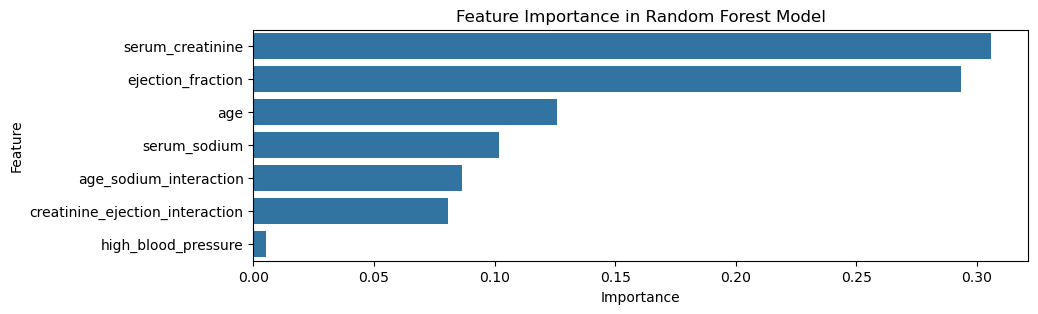

In [34]:
# Feature Importance
importances = rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 3))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Random Forest Model')
plt.show()

In [35]:
import joblib
from sklearn.ensemble import RandomForestClassifier

# Save the trained model to a file
model_filename = 'HeartFailure_RF_Model.pkl'
joblib.dump(rf, model_filename)

print(f"Model saved to {model_filename}")

Model saved to HeartFailure_RF_Model.pkl


In [36]:
# Load the model from the file
loaded_rf = joblib.load(model_filename)

# Example of using the loaded model to make predictions
y_pred_loaded_rf = loaded_rf.predict(X_test_scaled)

print('Loaded Random Forest Accuracy:', accuracy_score(y_test, y_pred_loaded_rf))

Loaded Random Forest Accuracy: 0.8627450980392157


In [37]:
# new data
new_data = pd.DataFrame({
    'age': [60],
        'serum_creatinine': [1.8],
    'ejection_fraction': [35],
        'creatinine_ejection_interaction': [36],
    'serum_sodium': [135],
    'age_sodium_interaction': [6850],
        'high_blood_pressure': [0],

})

# Scale the new data
new_data_scaled = scaler.transform(new_data)

# Predict using the trained model
new_prediction = loaded_rf.predict(new_data_scaled)
print("Prediction for new data (0 = Alive, 1 = Died):", new_prediction)

Prediction for new data (0 = Alive, 1 = Died): [1]
